In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [7]:
train_data = pd.read_csv("train_data.txt", sep=':::', names = ['ID','TITLE','GENRE','DESCRIPTION'])
display(train_data.head())
print(train_data.shape)

test_data = pd.read_csv("test_data.txt", sep=':::', names = ['ID','TITLE','GENRE','DESCRIPTION'])
print(display(test_data.head()))
print(test_data.shape)

test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)
                                                                           


C:\Users\new\AppData\Local\Temp\ipykernel_14168\2361897985.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt", sep=':::', names = ['ID','TITLE','GENRE','DESCRIPTION'])


ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

(19166, 4)


C:\Users\new\AppData\Local\Temp\ipykernel_14168\2361897985.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt", sep=':::', names = ['ID','TITLE','GENRE','DESCRIPTION'])


ID                          TITLE  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                               GENRE  DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...          NaN  
1   Spain, March 1964: Quico is a very naughty ch...          NaN  
2   One year in the life of Albin and his family ...          NaN  
3   His father has died, he hasn't spoken with hi...          NaN  
4   Before he was known internationally as a mart...          NaN

None
(16401, 4)


C:\Users\new\AppData\Local\Temp\ipykernel_14168\2361897985.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])


ID                          TITLE          GENRE  \
0   1          Edgar's Lunch (1998)       thriller    
1   2      La guerra de papá (1977)         comedy    
2   3   Off the Beaten Track (2010)    documentary    
3   4        Meu Amigo Hindu (2015)          drama    
4   5             Er nu zhai (1955)          drama    

                                         DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

None
(54200, 4)


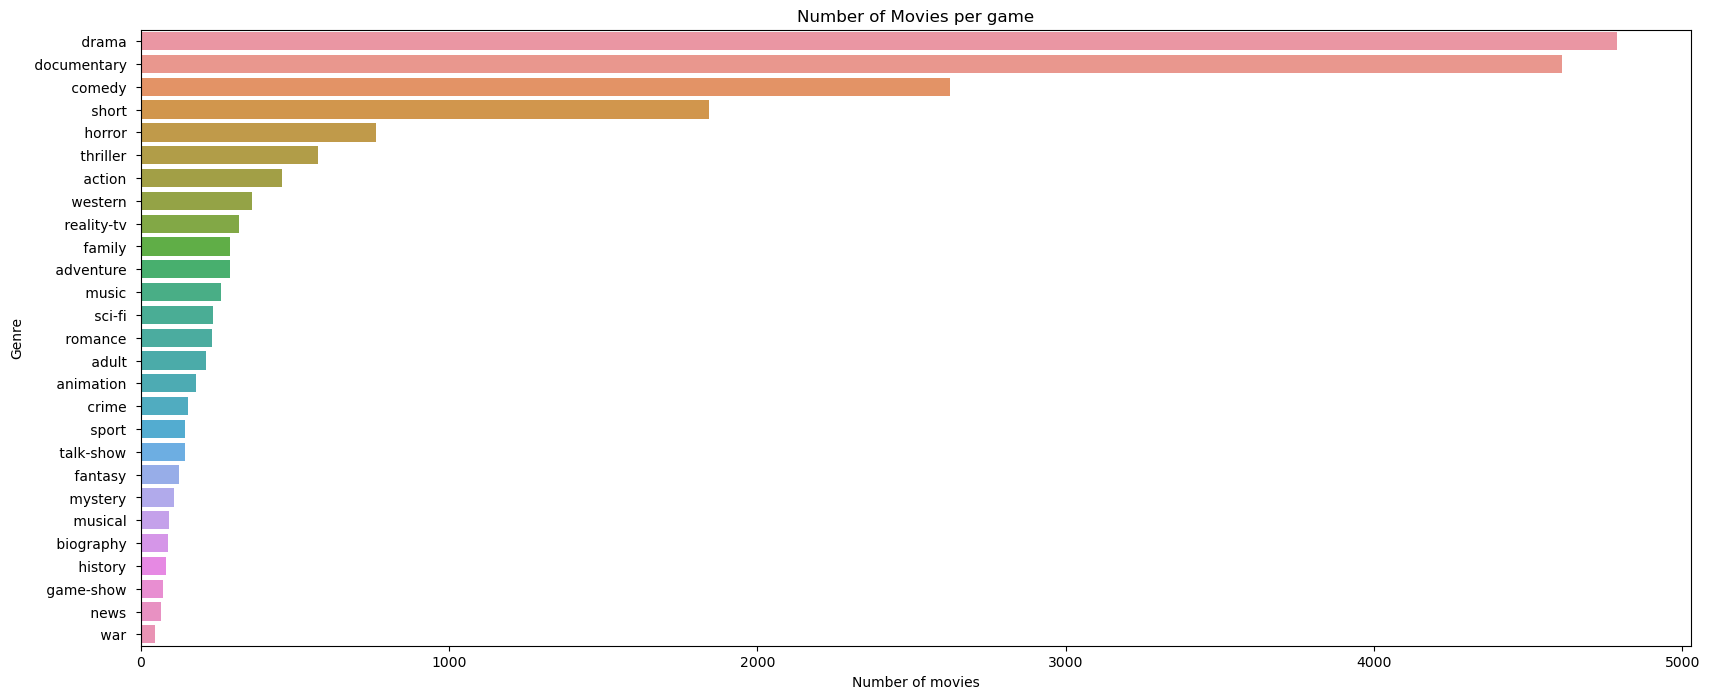

In [11]:
plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.title('Number of Movies per game')
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.show()

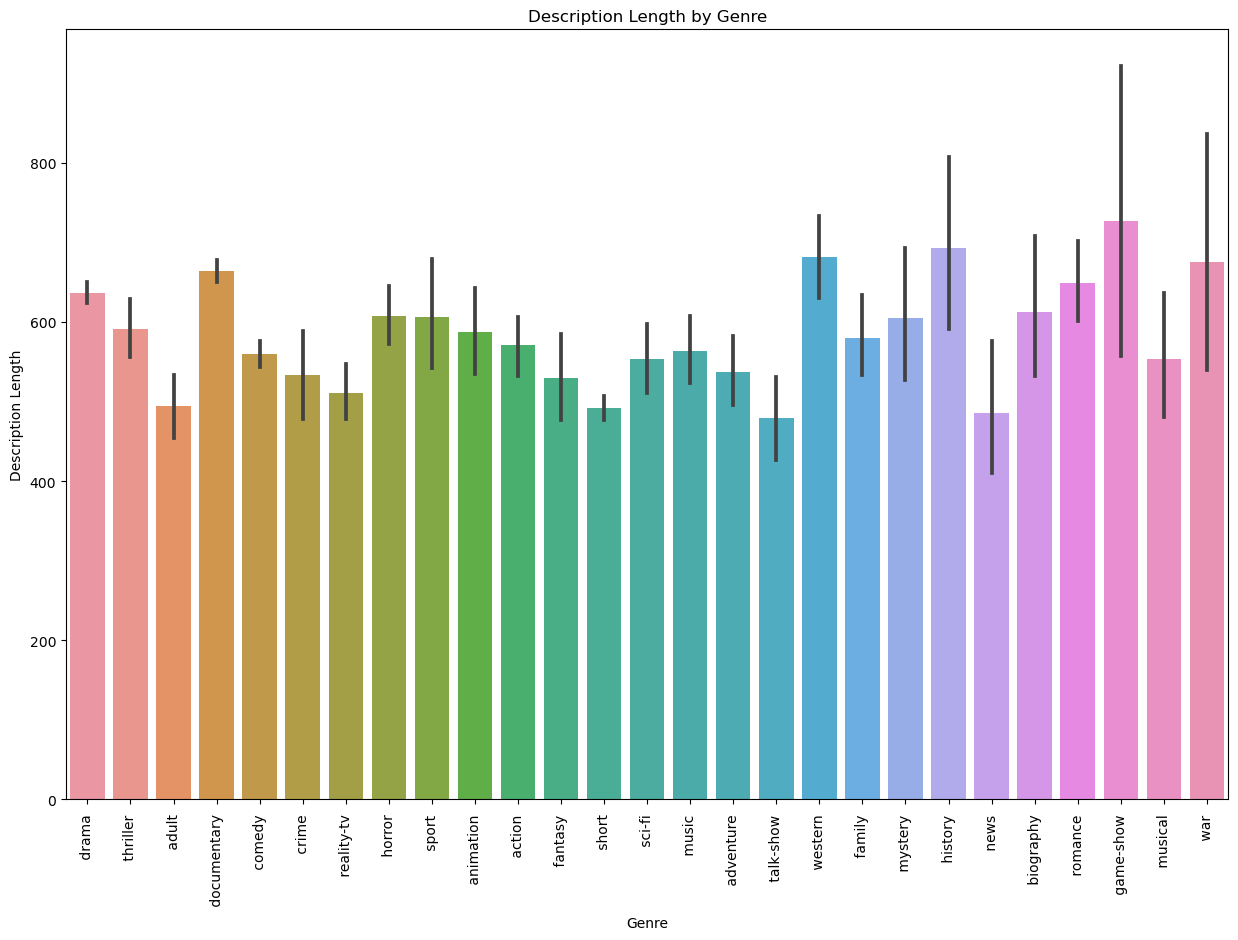

In [14]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15,10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

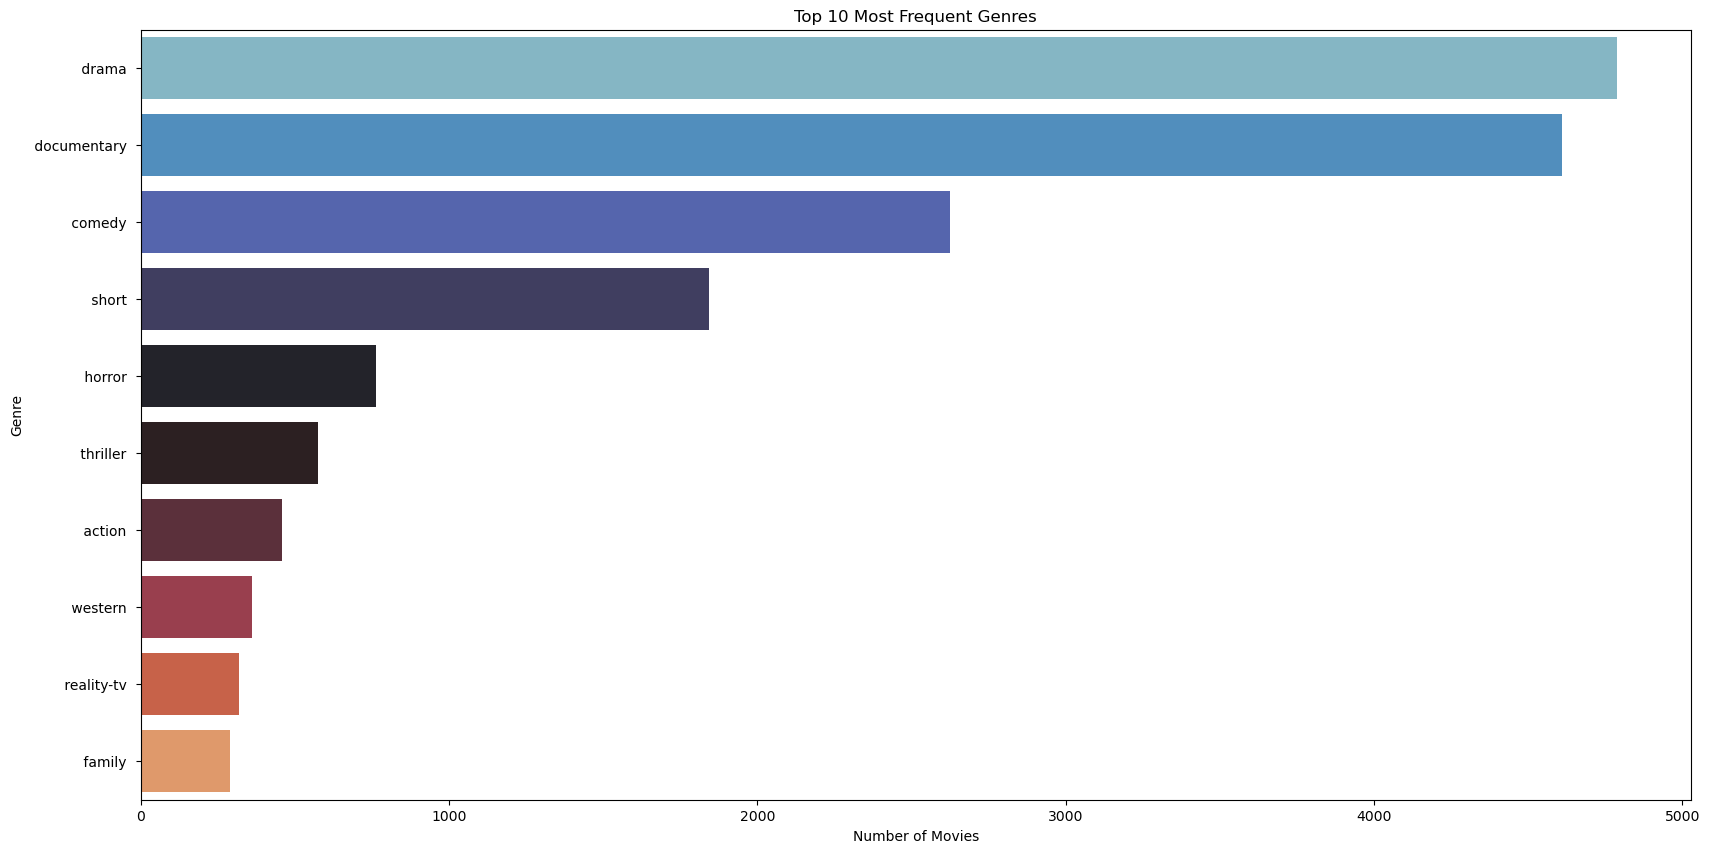

In [21]:
top_genre = train_data['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x=top_genre.values, y=top_genre.index, palette='icefire')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [41]:
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("",inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
x_train = t_v.fit_transform(train_data['DESCRIPTION'])
x_test = t_v.transform(test_solution_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [42]:
x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(x_train_sub, y_train_sub)

y_val_pred = clf.predict(x_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

C:\Users\new\Desktop\movie_genre_prediction\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Validation Accuracy: 0.5417318727177882
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.20      0.25        82
           1       0.64      0.23      0.34        30
           2       0.55      0.20      0.30        54
           3       0.50      0.04      0.08        45
           4       0.00      0.00      0.00        23
           5       0.48      0.51      0.49       512
           6       0.00      0.00      0.00        34
           7       0.62      0.82      0.71       931
           8       0.52      0.70      0.60       956
           9       0.36      0.06      0.11        64
          10       0.40      0.07      0.12        29
          11       1.00      0.60      0.75        15
          12       0.00      0.00      0.00        17
          13       0.70      0.62      0.66       153
          14       0.58      0.38      0.46        55
          15       0.00      0.00      0.00        18
      

C:\Users\new\Desktop\movie_genre_prediction\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\new\Desktop\movie_genre_prediction\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\new\Desktop\movie_genre_prediction\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [43]:
y_pred = clf.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.5542066420664207
Test Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.25      0.31      1314
           1       0.62      0.26      0.37       590
           2       0.53      0.22      0.31       775
           3       0.33      0.06      0.10       498
           4       0.50      0.00      0.01       264
           5       0.50      0.53      0.51      7446
           6       0.36      0.03      0.05       505
           7       0.65      0.83      0.73     13096
           8       0.53      0.71      0.61     13612
           9       0.38      0.08      0.13       783
          10       0.37      0.04      0.08       322
          11       0.87      0.61      0.71       193
          12       0.00      0.00      0.00       243
          13       0.59      0.55      0.57      2204
          14       0.63      0.43      0.51       731
          15       0.23      0.02      0.03       276
          16      

In [52]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie about science"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_movie(sample_descr_for_movie1))

 drama 
 drama 
